In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1336,2020-08-18,United Kingdom,319688.0,319197.0,41427.0,41369.0,491.0,58.0
1337,2020-08-18,Germany,224672.0,224014.0,9239.0,9232.0,658.0,7.0
1338,2020-08-18,Iran,347236.0,345450.0,19891.0,19804.0,1786.0,87.0
1339,2020-08-18,Turkey,250411.0,250542.0,5993.0,5996.0,-131.0,-3.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  5608.62192393736
RMSE =  21303.907928292203


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  296.7718120805369
RMSE =  723.956401820931


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  36298.234375
RMSE =  65929.54228153813
-- World performances for deaths --
MAE =  1603.75
RMSE =  1973.5762471019457


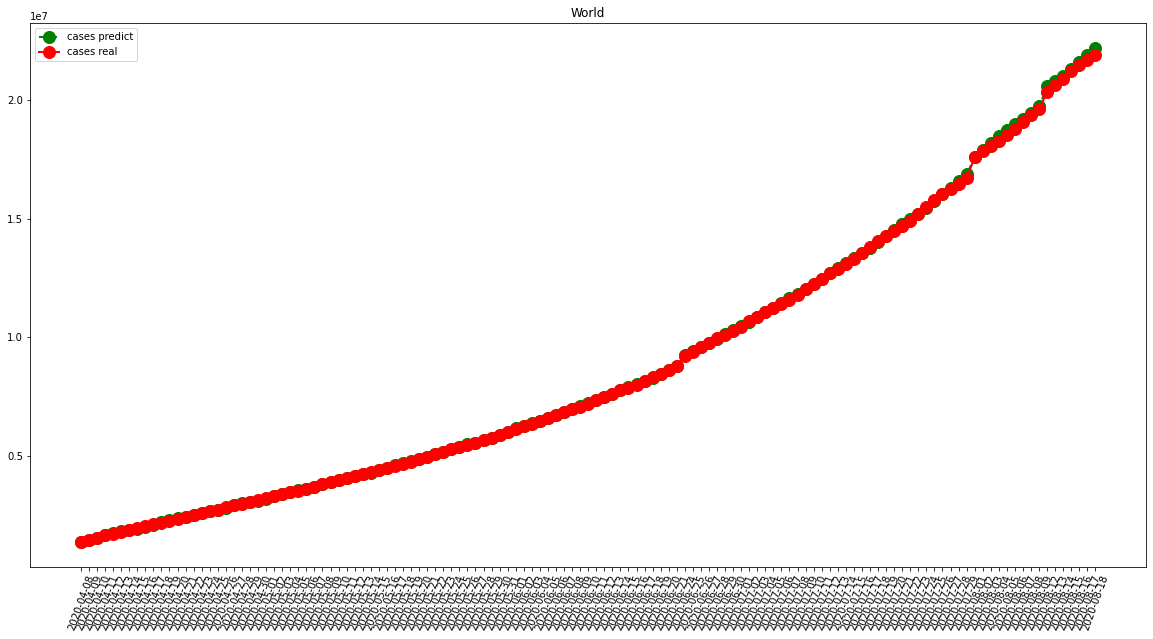

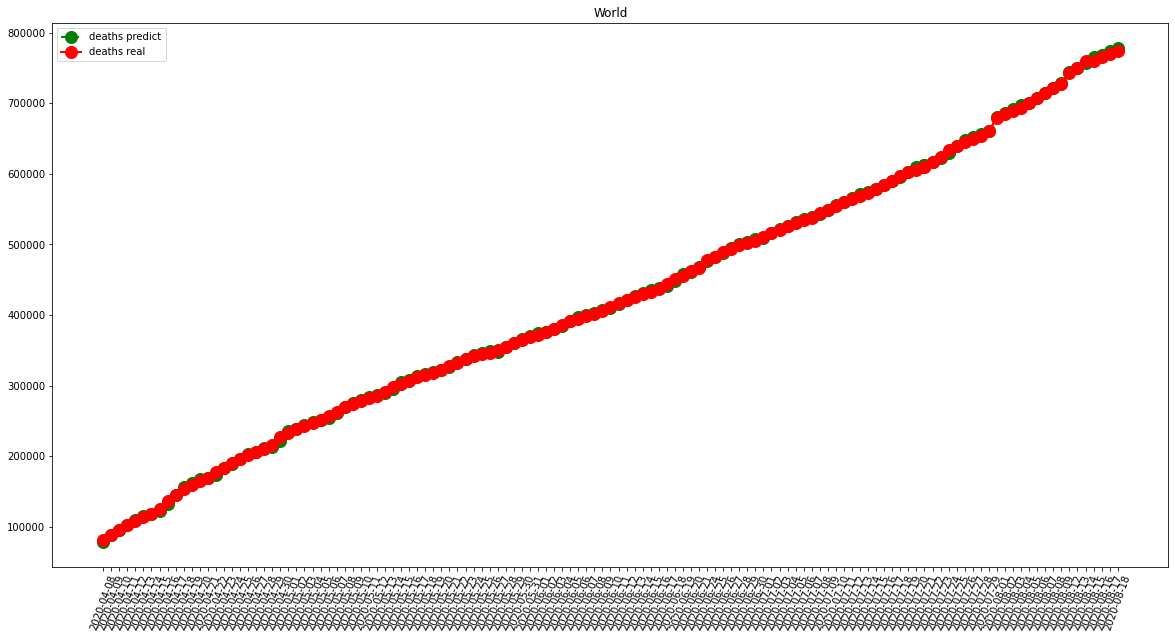

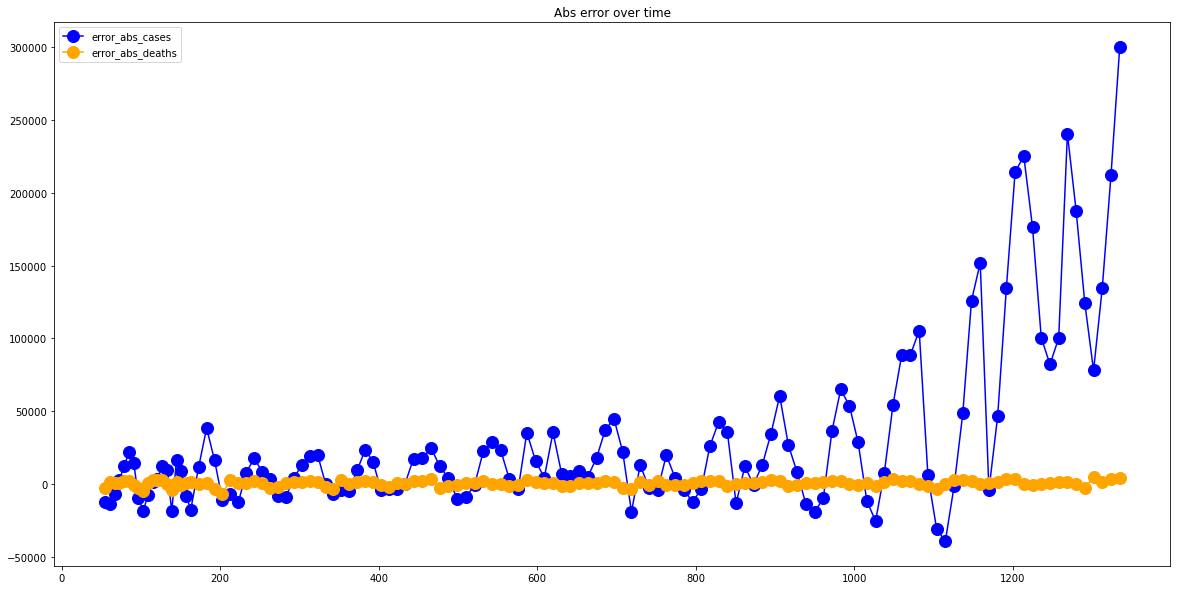

In [7]:
visShow("World")

-- France performances for cases --
MAE =  894.7391304347826
RMSE =  1371.6689664868811
-- France performances for deaths --
MAE =  133.34782608695653
RMSE =  285.42686060289276


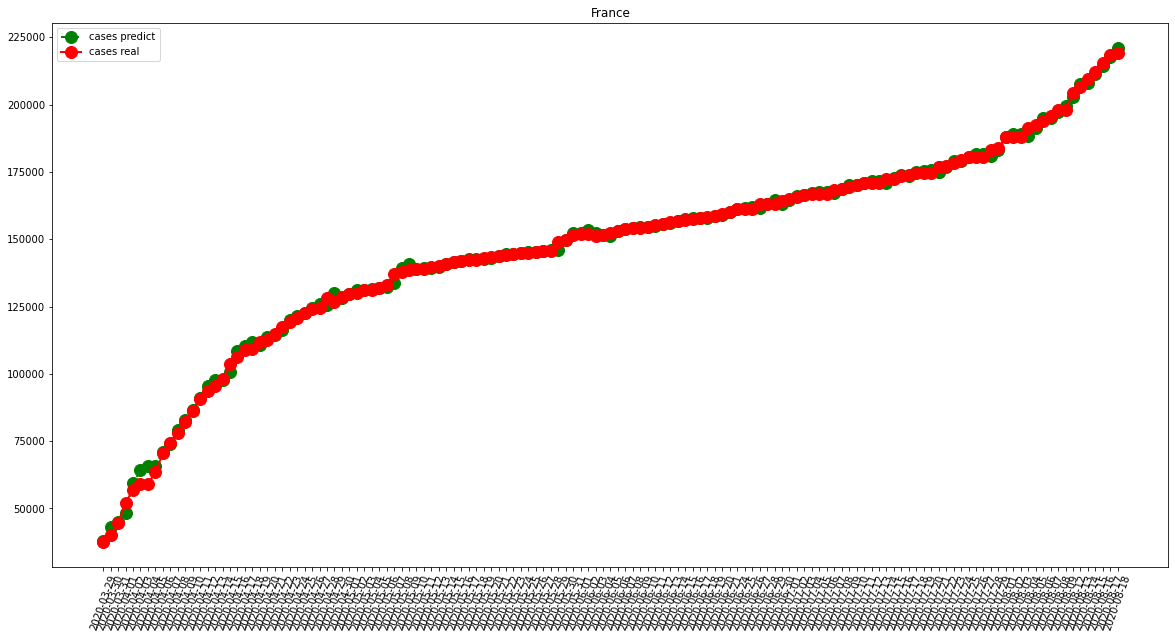

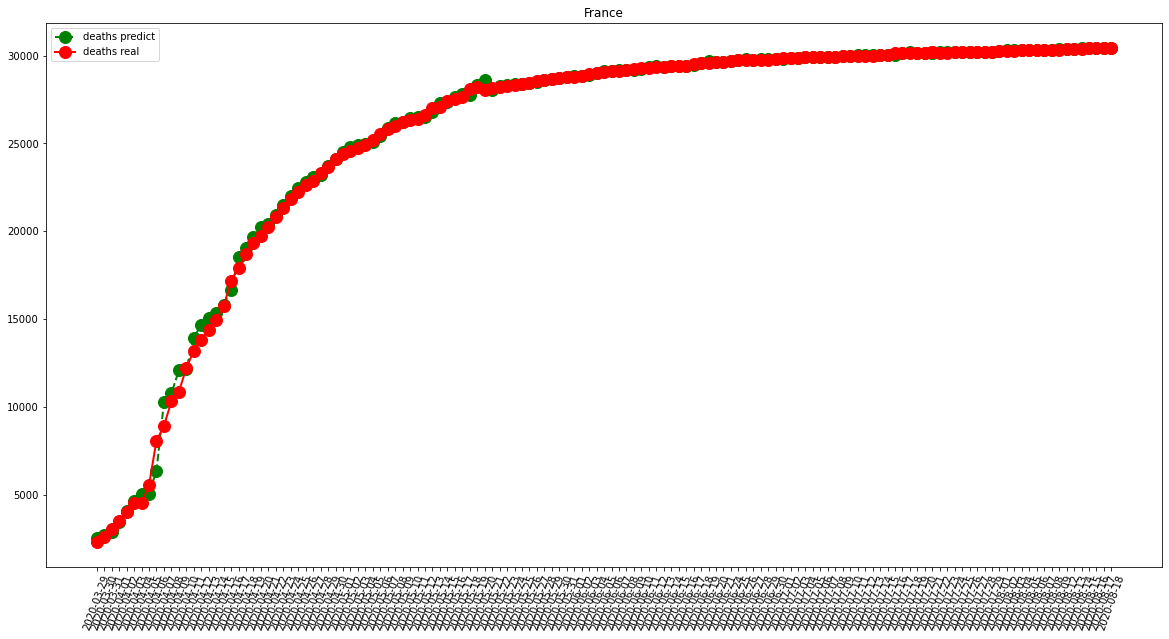

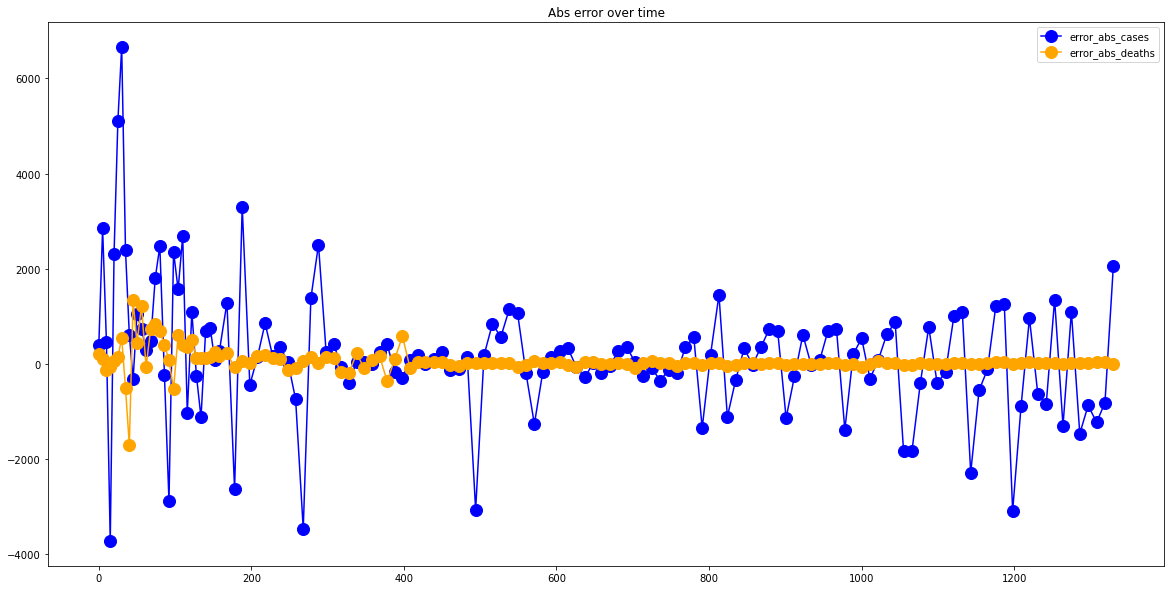

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  305.4855072463768
RMSE =  468.2449888308655
-- Italy performances for deaths --
MAE =  78.60144927536231
RMSE =  252.60542353639204


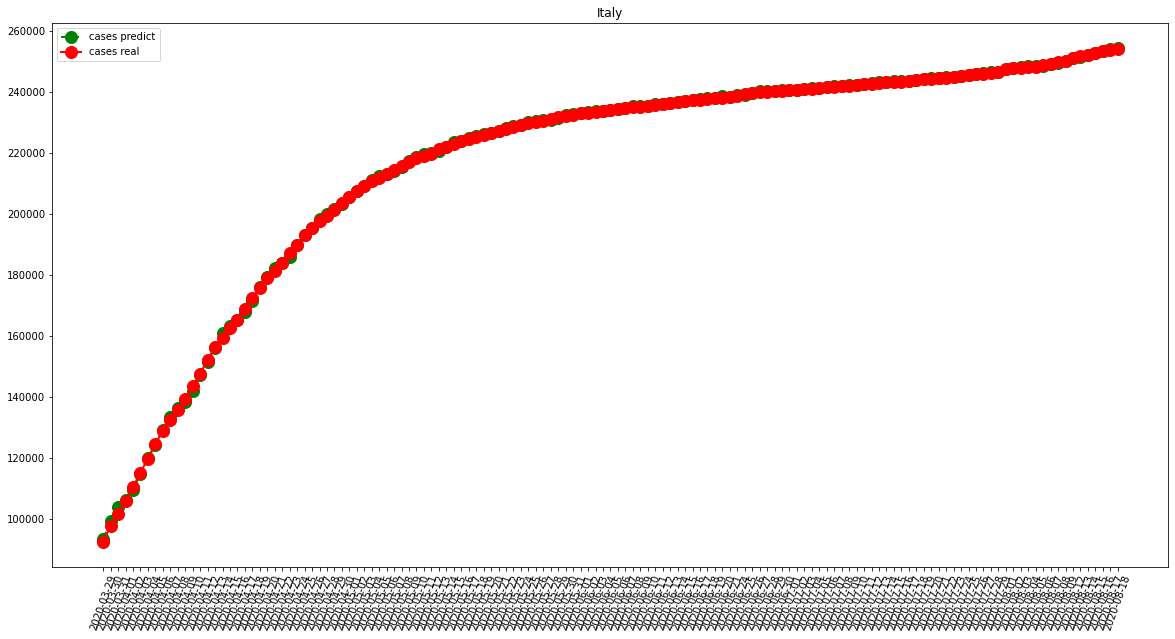

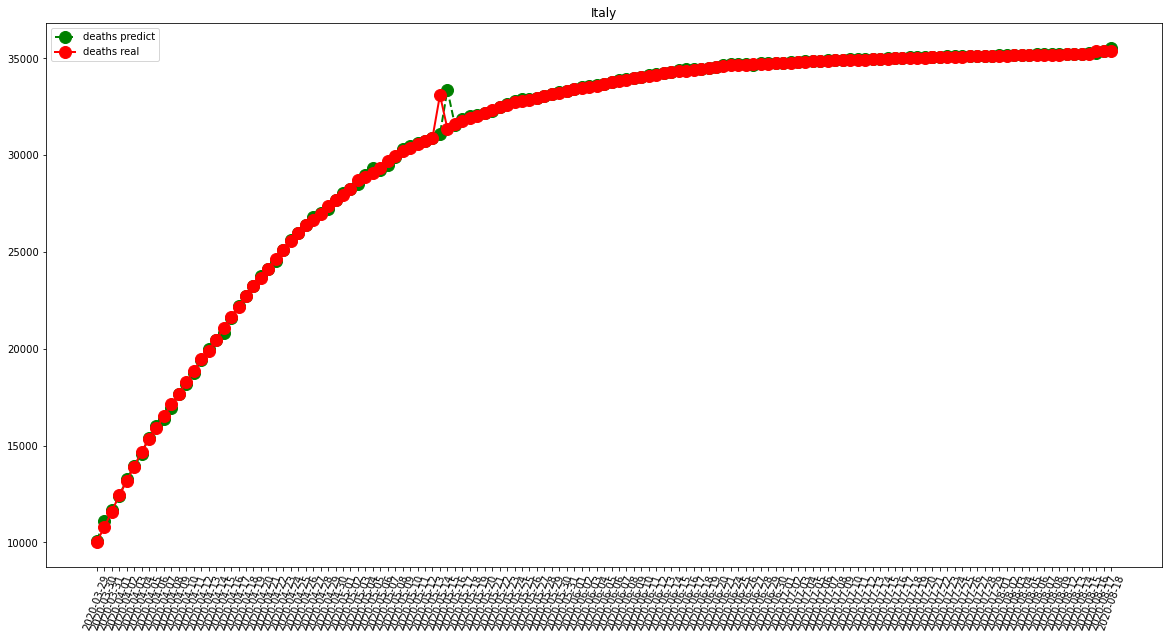

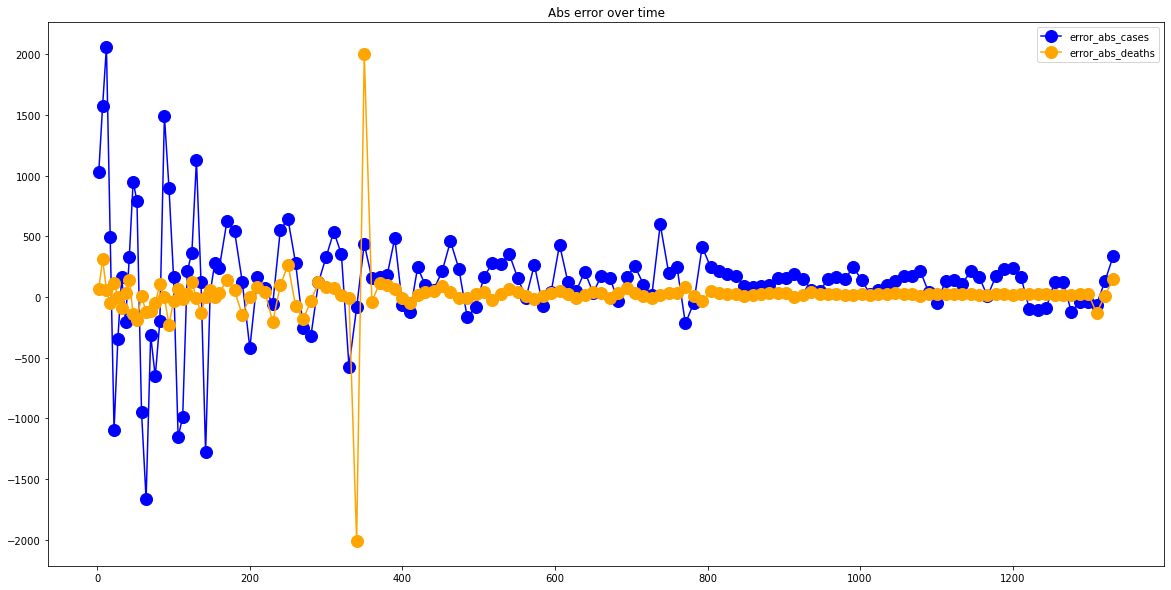

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1413.2028985507247
RMSE =  2753.617891566225
-- Spain performances for deaths --
MAE =  135.47826086956522
RMSE =  345.63459804006726


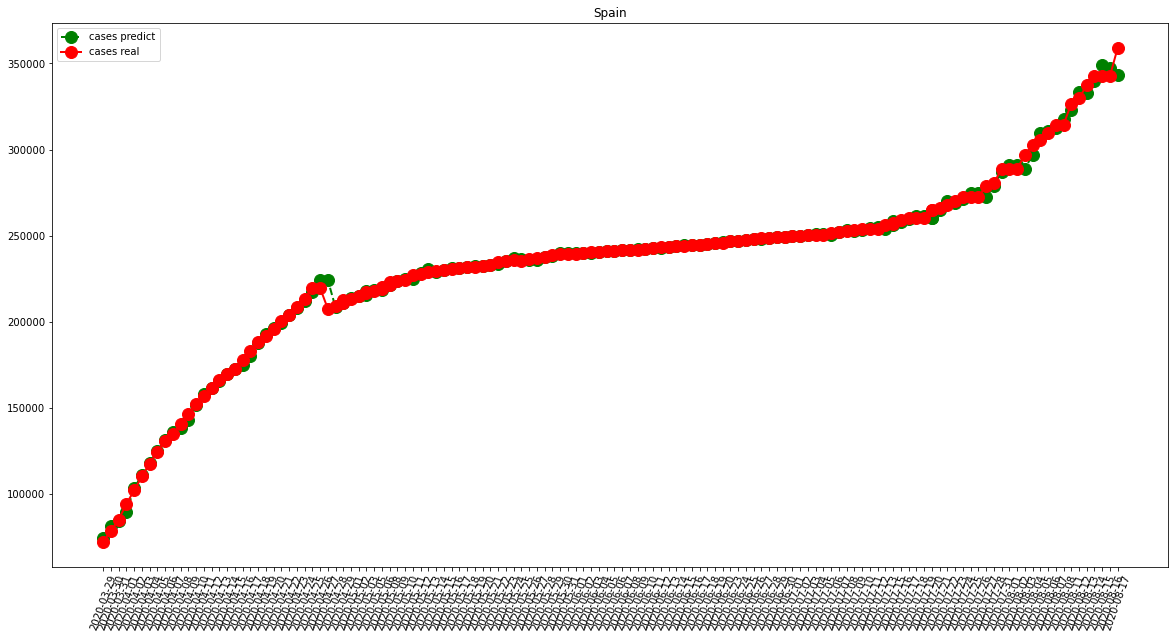

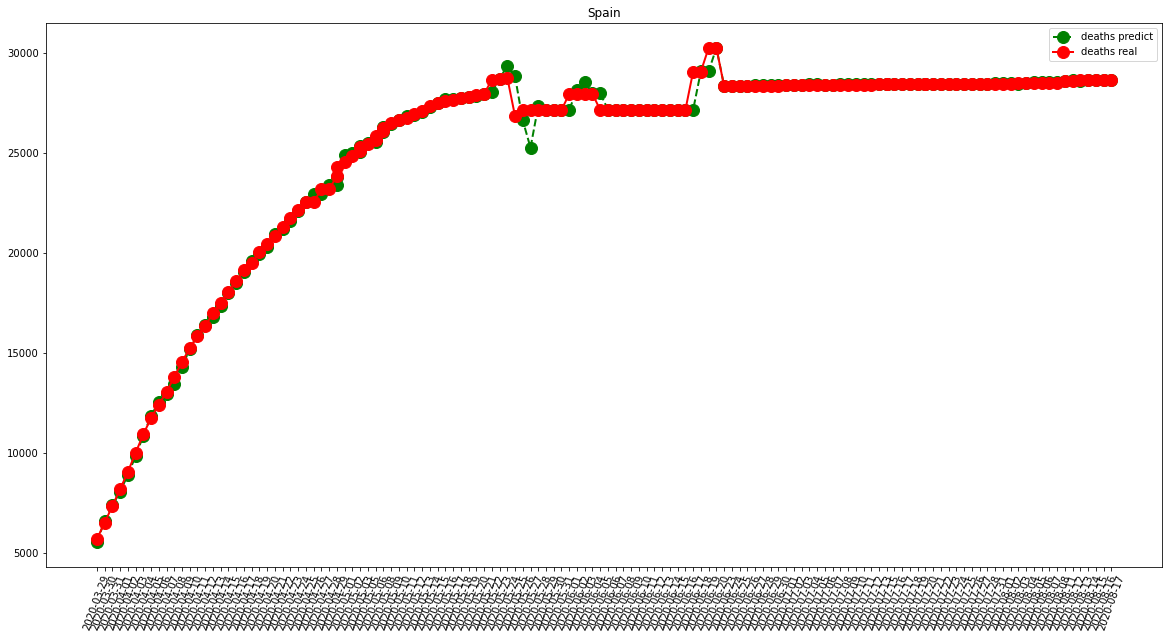

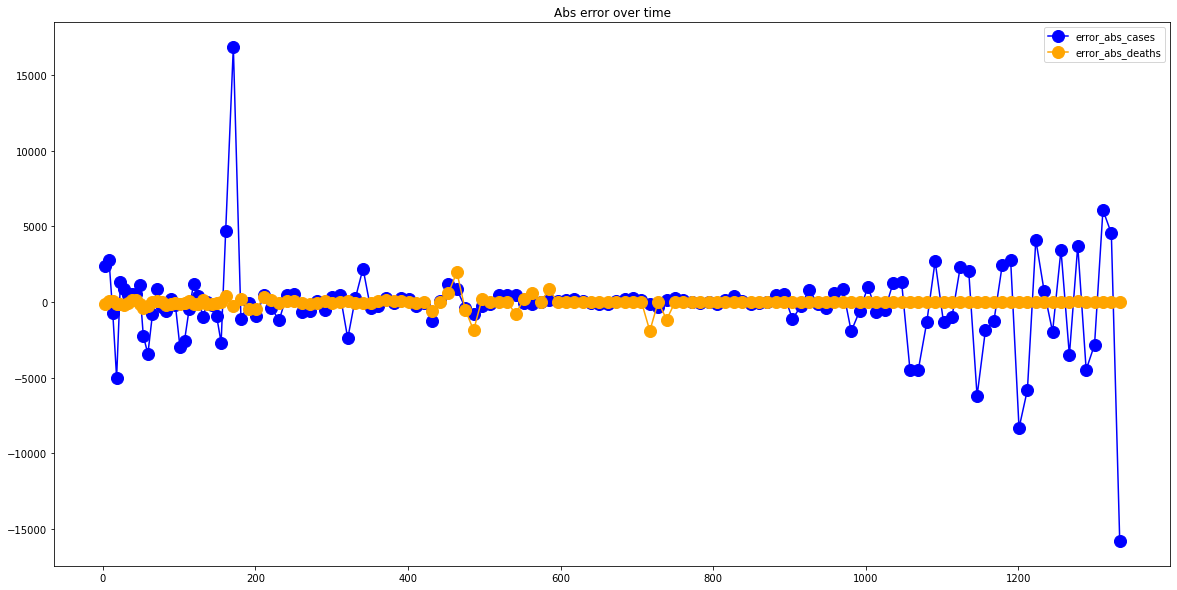

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  8711.159420289856
RMSE =  13453.284417148685
-- United States performances for deaths --
MAE =  496.731884057971
RMSE =  709.7638666322847


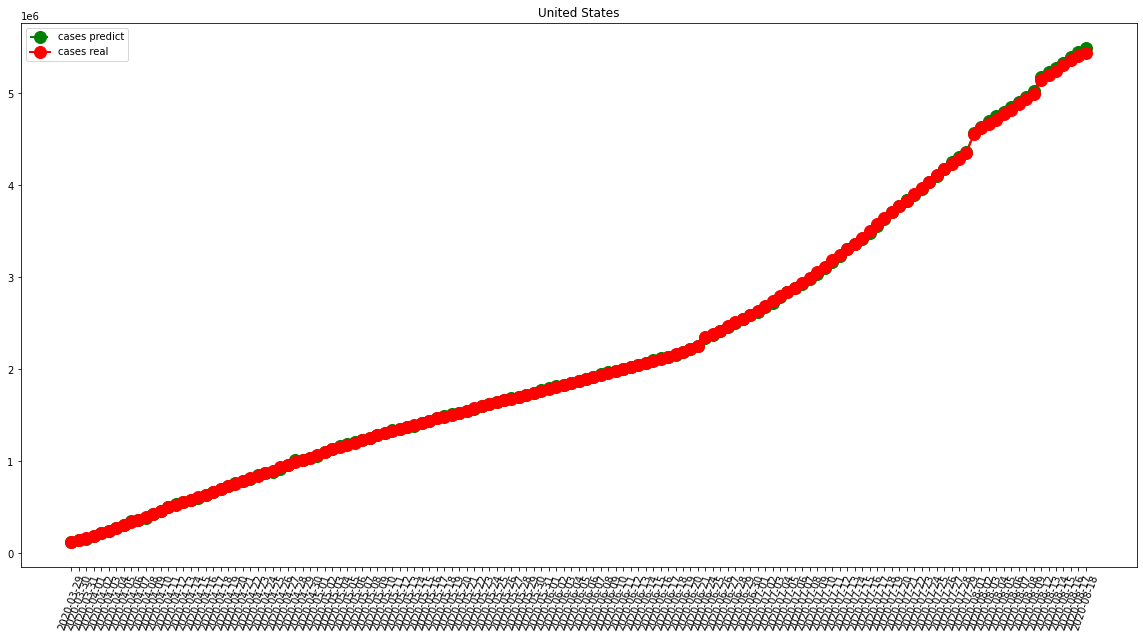

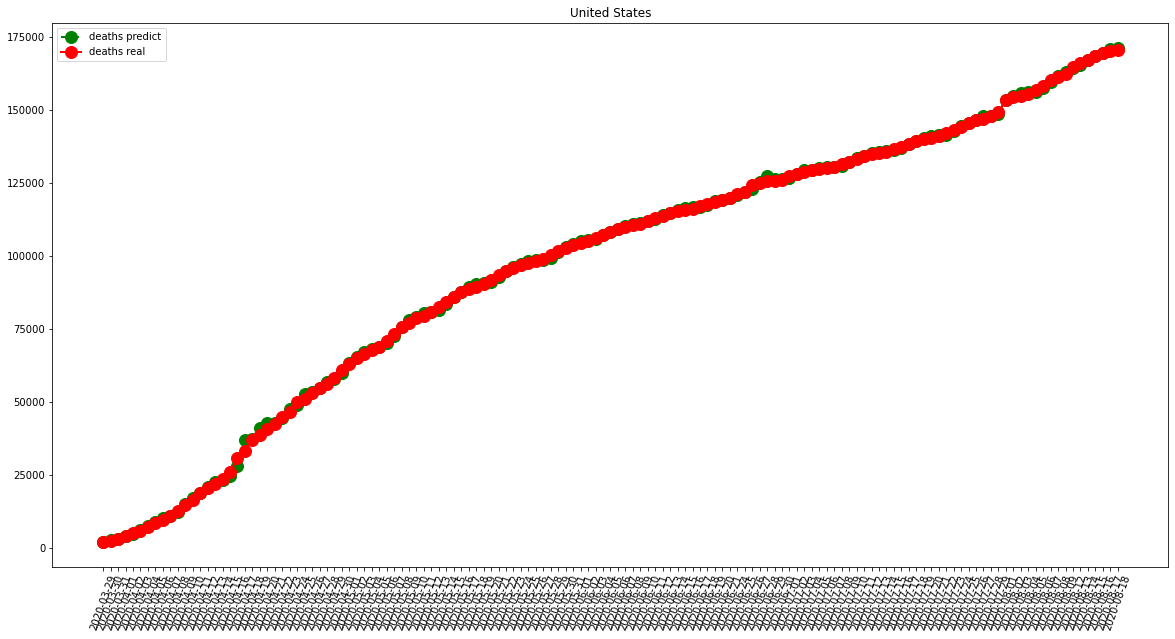

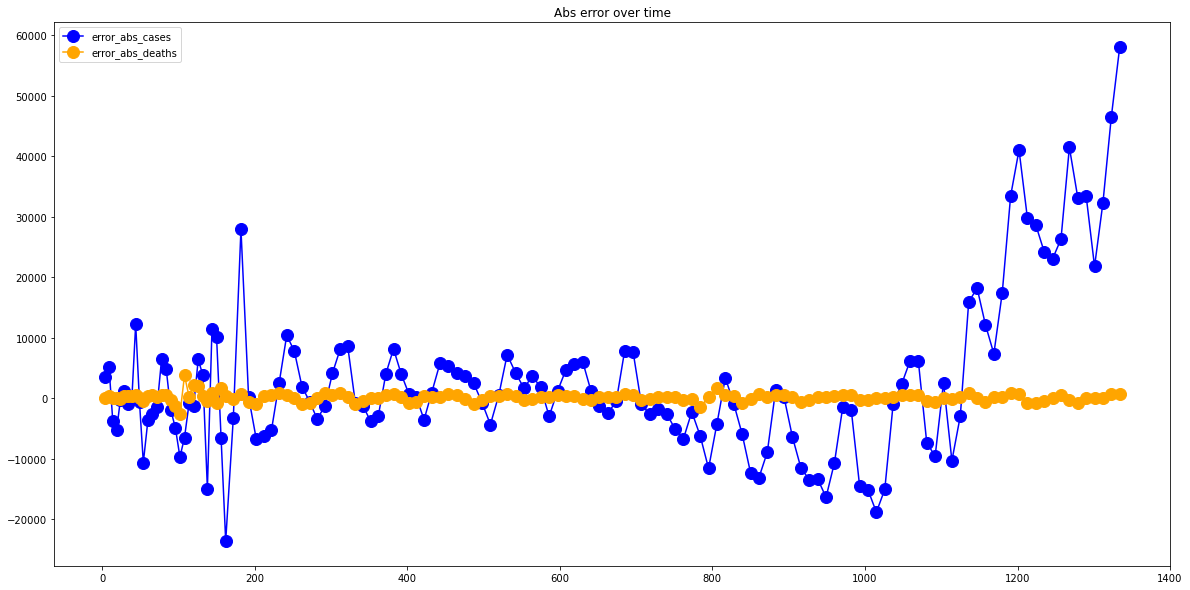

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  71.6159420289855
RMSE =  101.51265359835546
-- China performances for deaths --
MAE =  29.702898550724637
RMSE =  133.656085814909


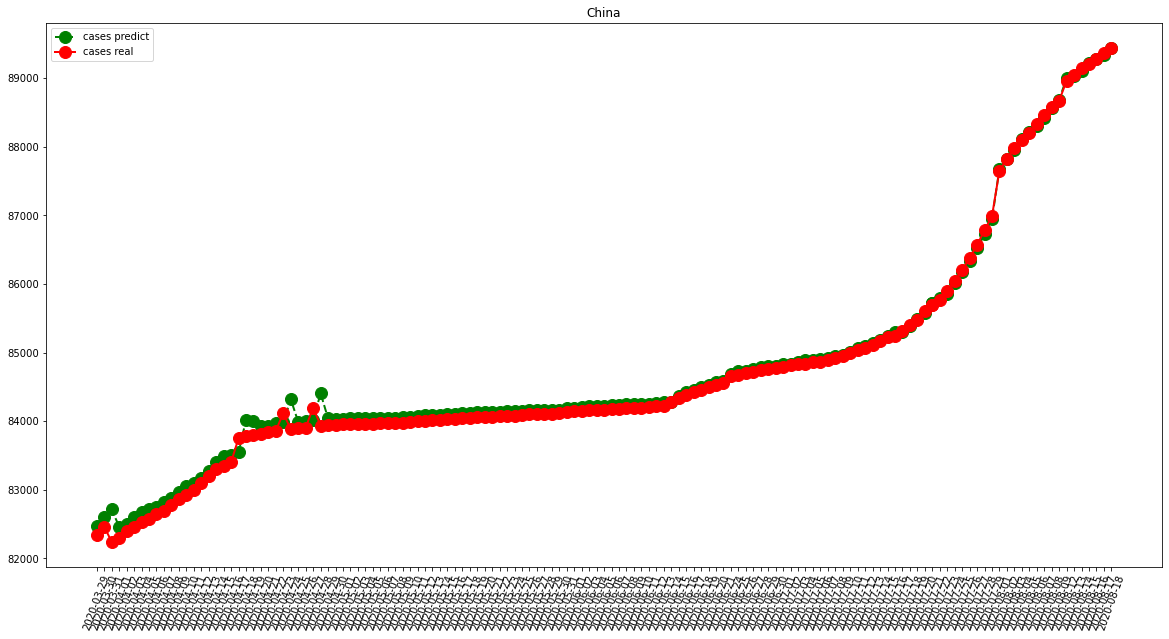

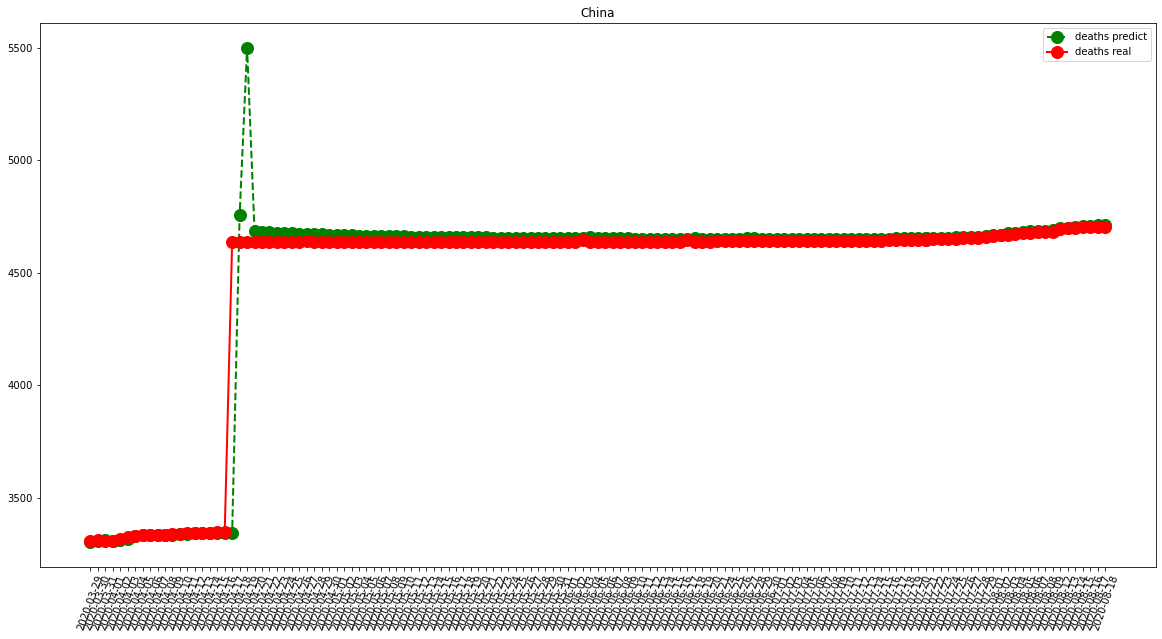

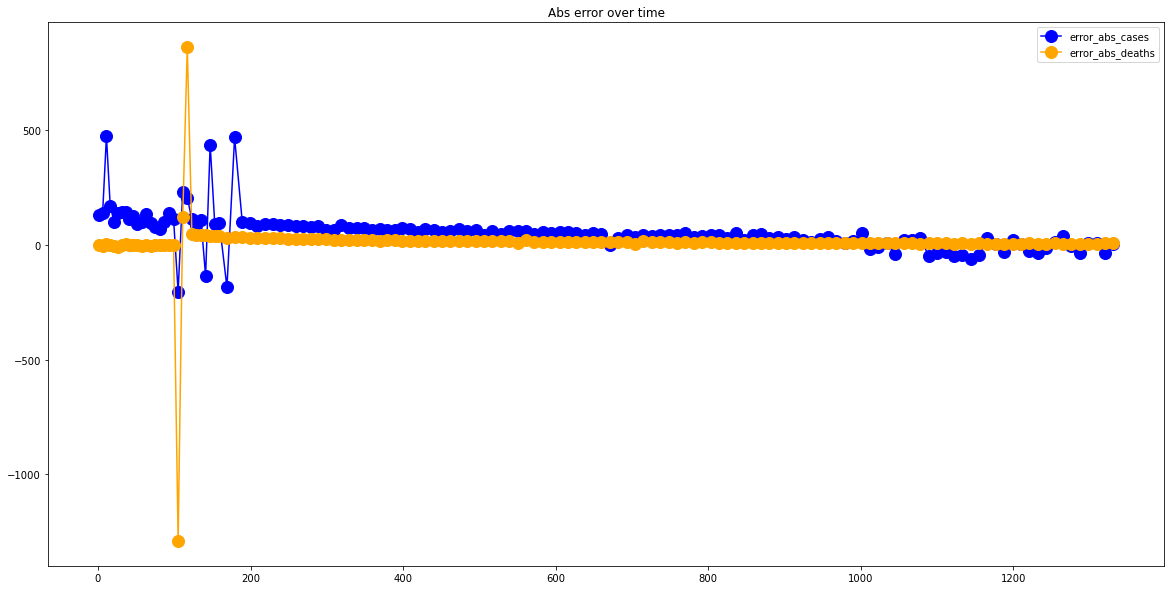

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1174.1818181818182
RMSE =  3986.0465056813555
-- United Kingdom performances for deaths --
MAE =  270.2
RMSE =  813.5829733625542


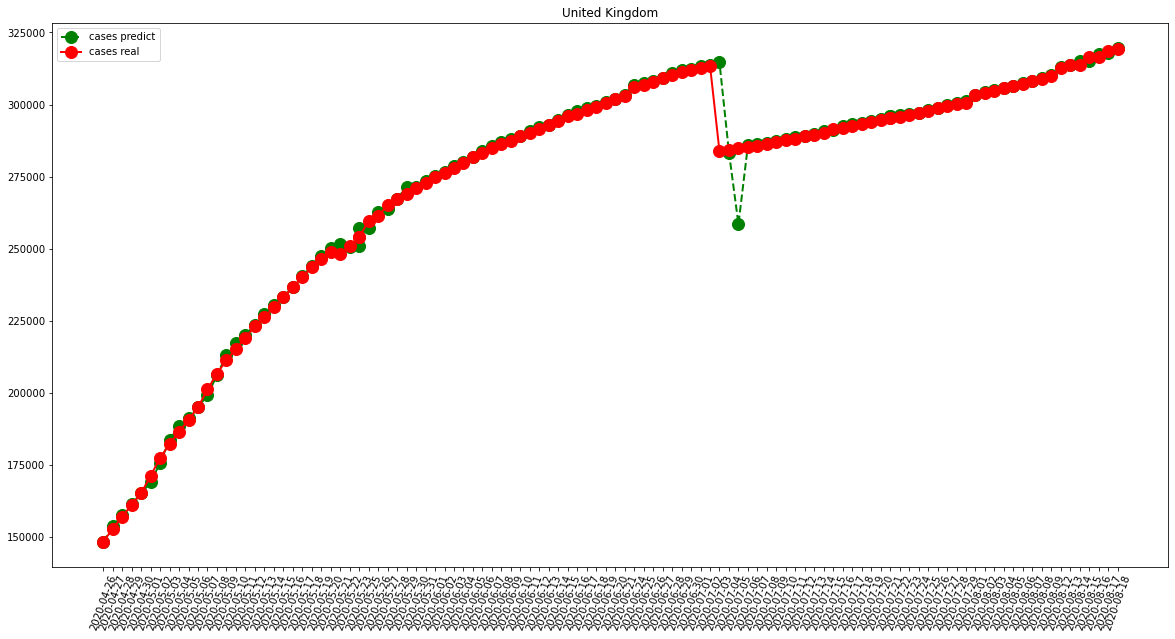

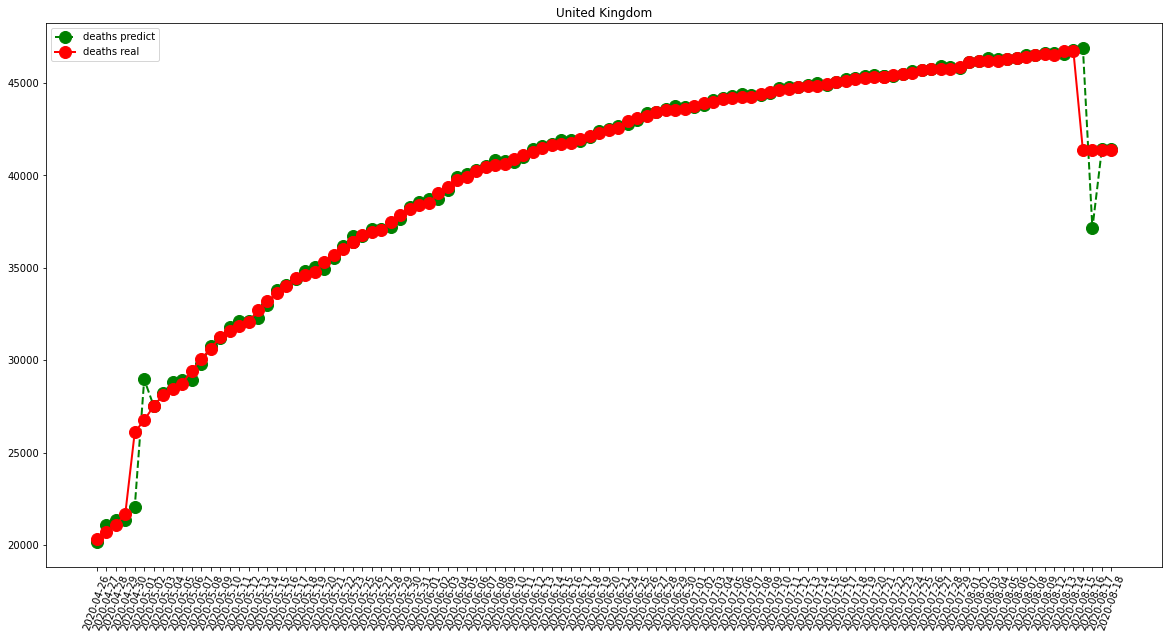

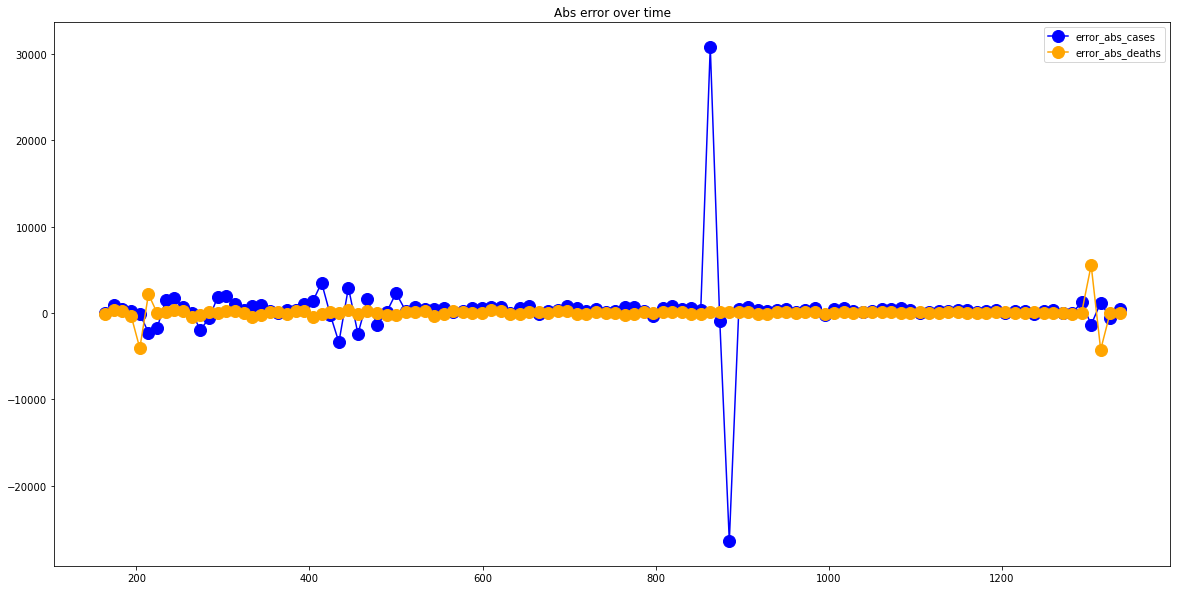

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  329.1181818181818
RMSE =  450.02663557535425
-- Germany performances for deaths --
MAE =  22.945454545454545
RMSE =  41.819960436484045


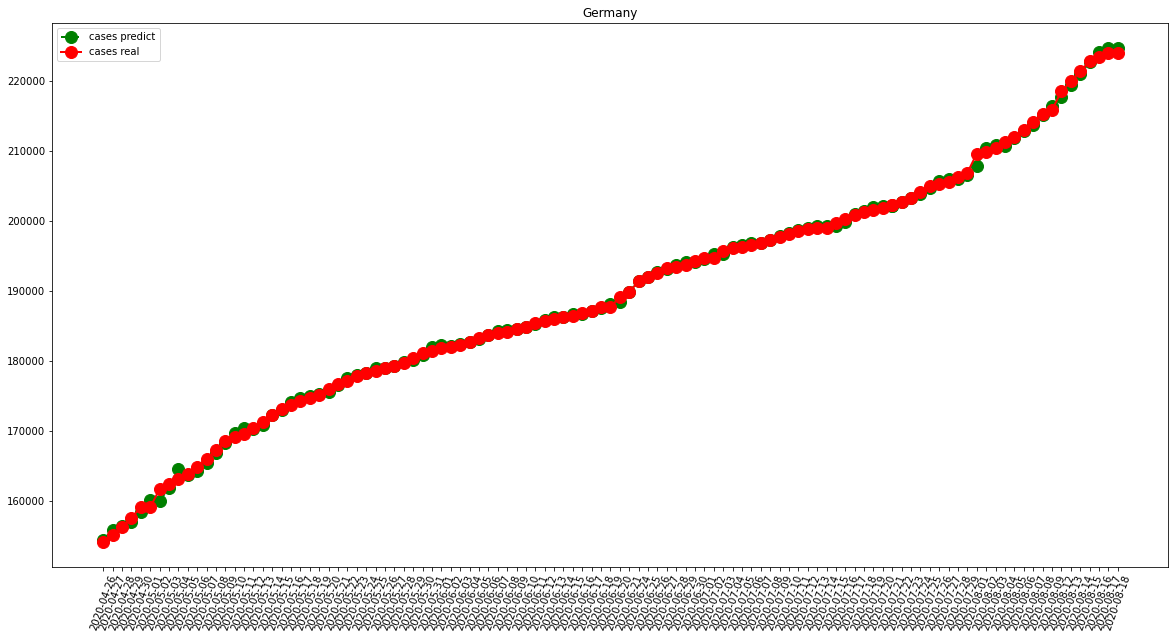

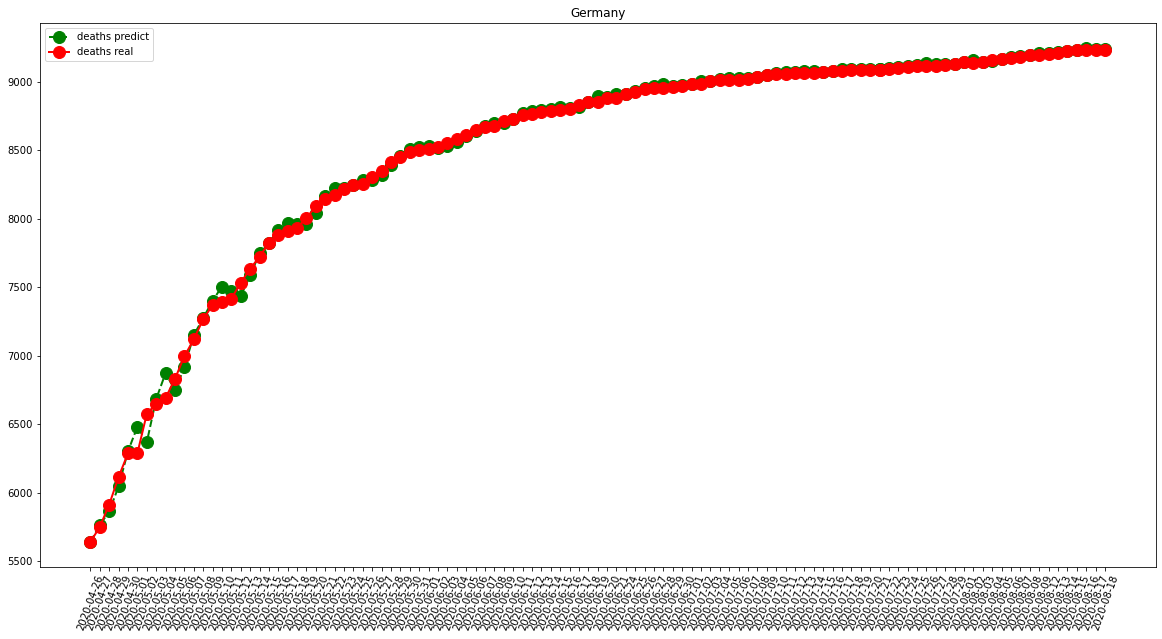

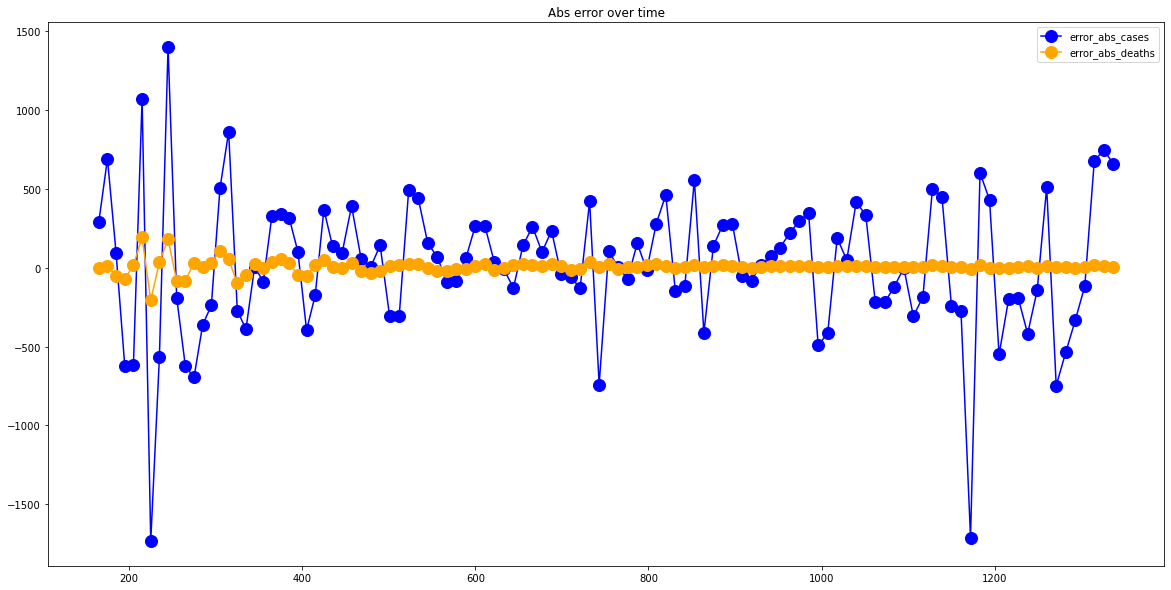

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  646.1454545454545
RMSE =  942.1689676678826
-- Iran performances for deaths --
MAE =  34.1
RMSE =  70.36004806448304


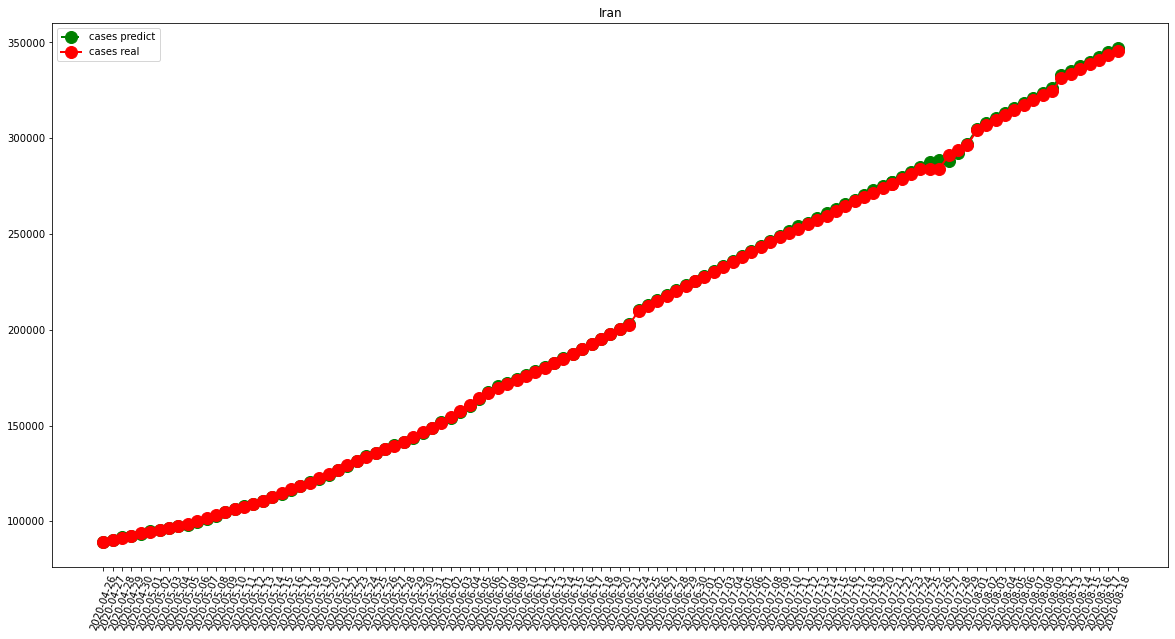

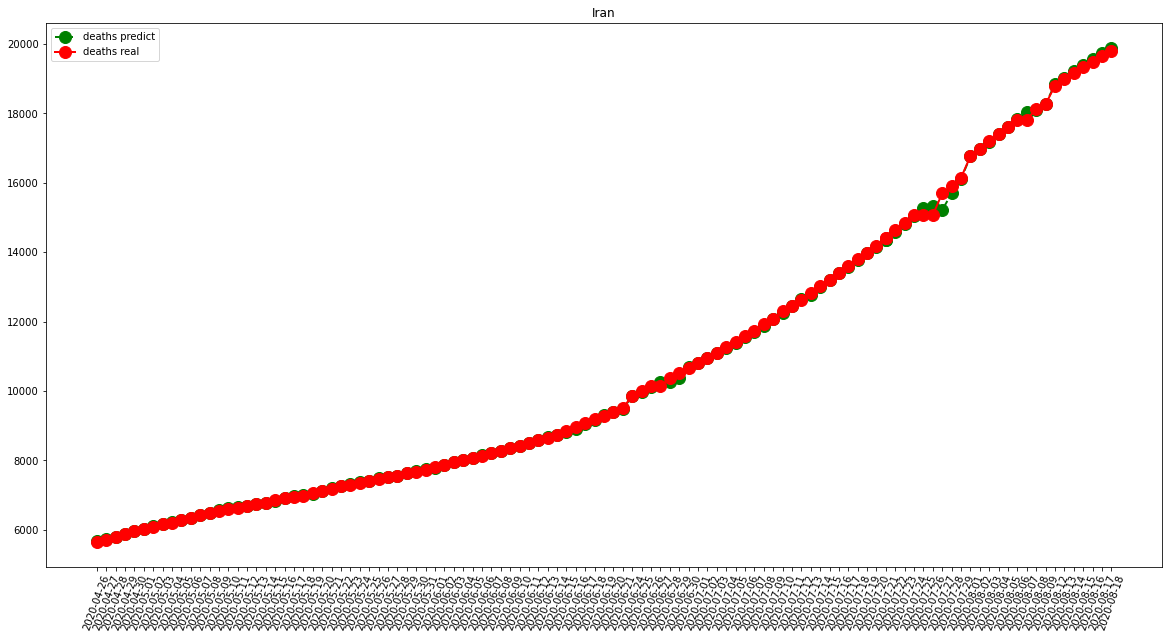

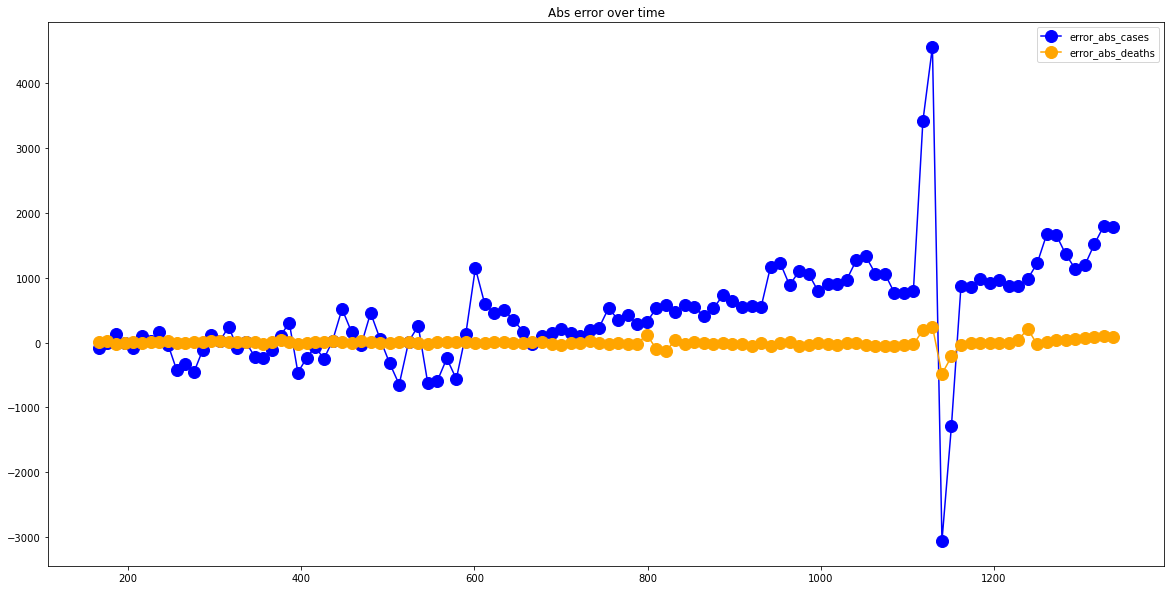

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  196.3909090909091
RMSE =  332.60480234875524
-- Turkey performances for deaths --
MAE =  17.536363636363635
RMSE =  96.79354786911631


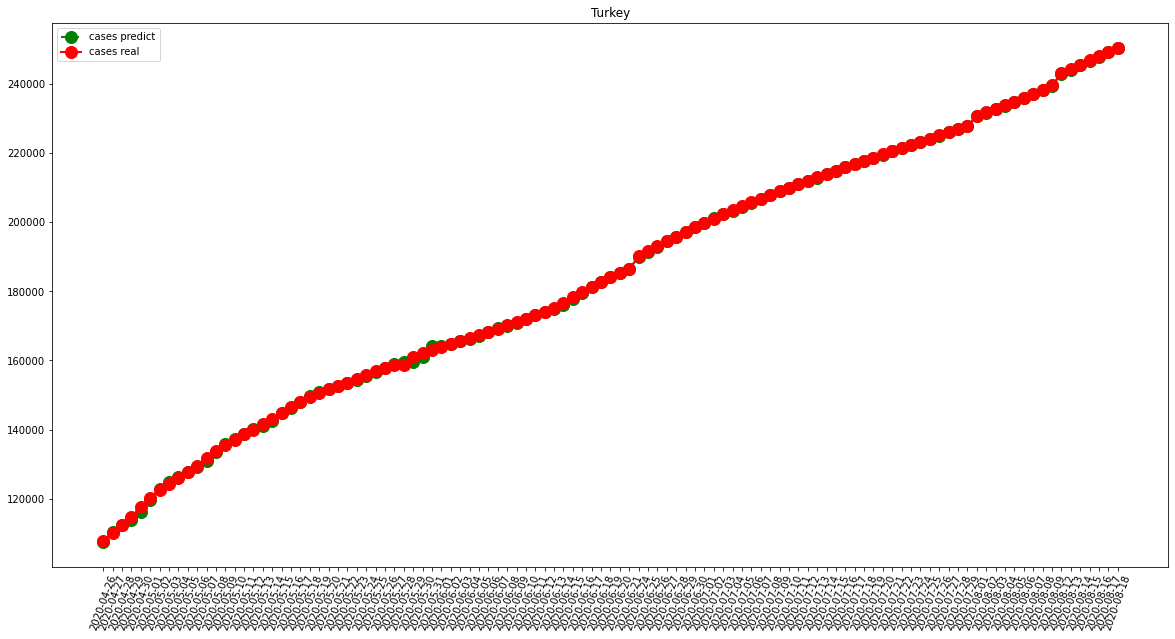

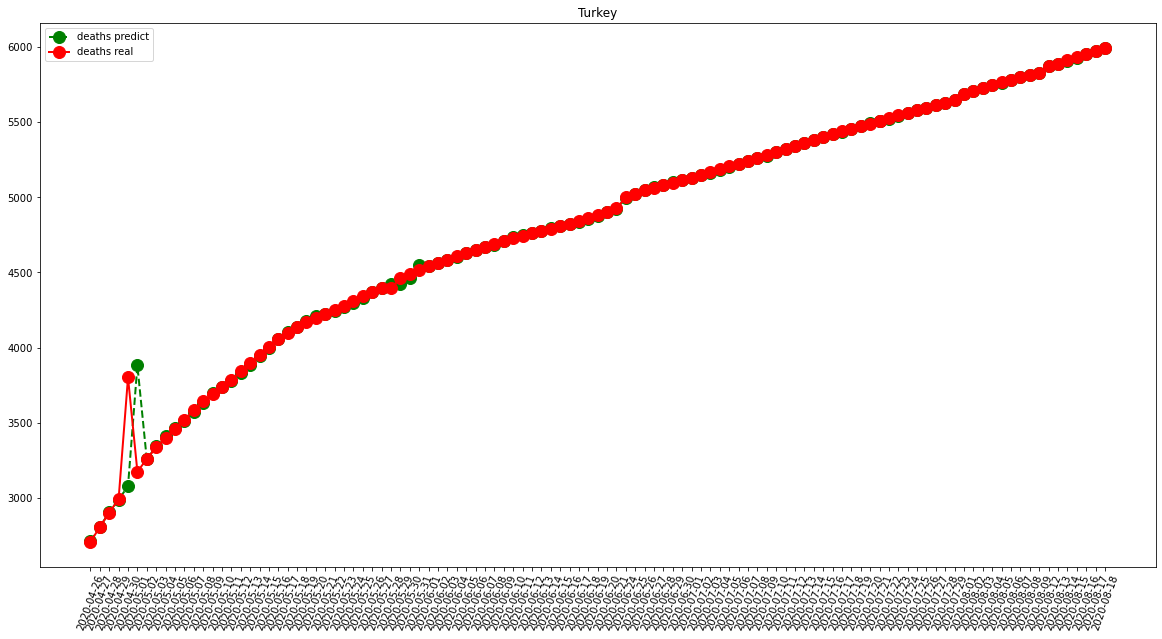

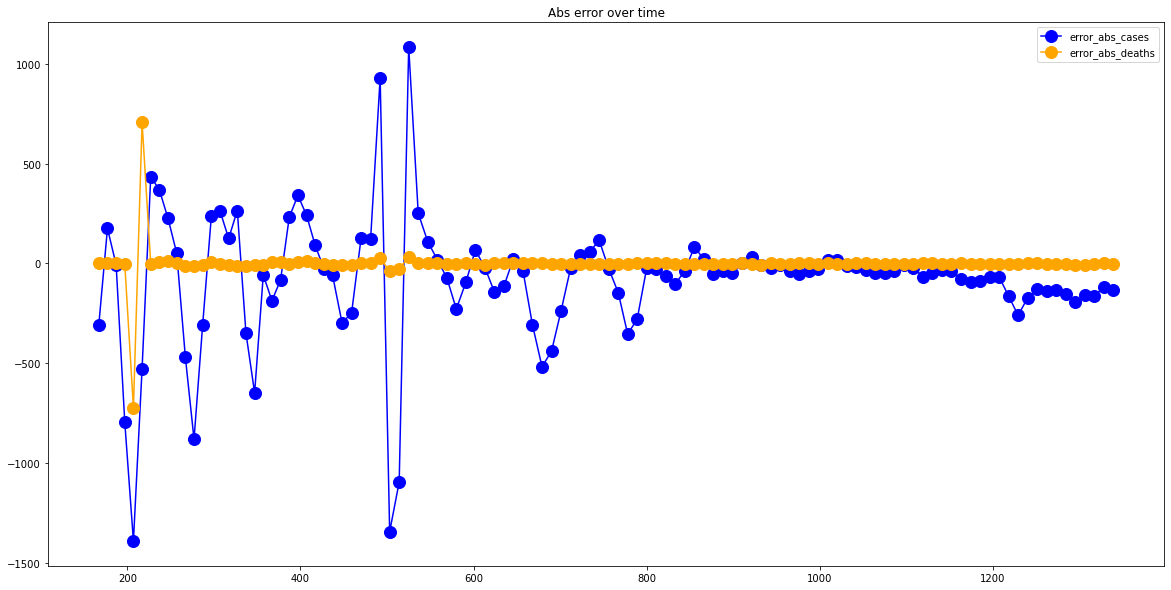

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  12581.56626506024
RMSE =  17021.993941220277
-- Brazil performances for deaths --
MAE =  411.71084337349396
RMSE =  505.1239857340526


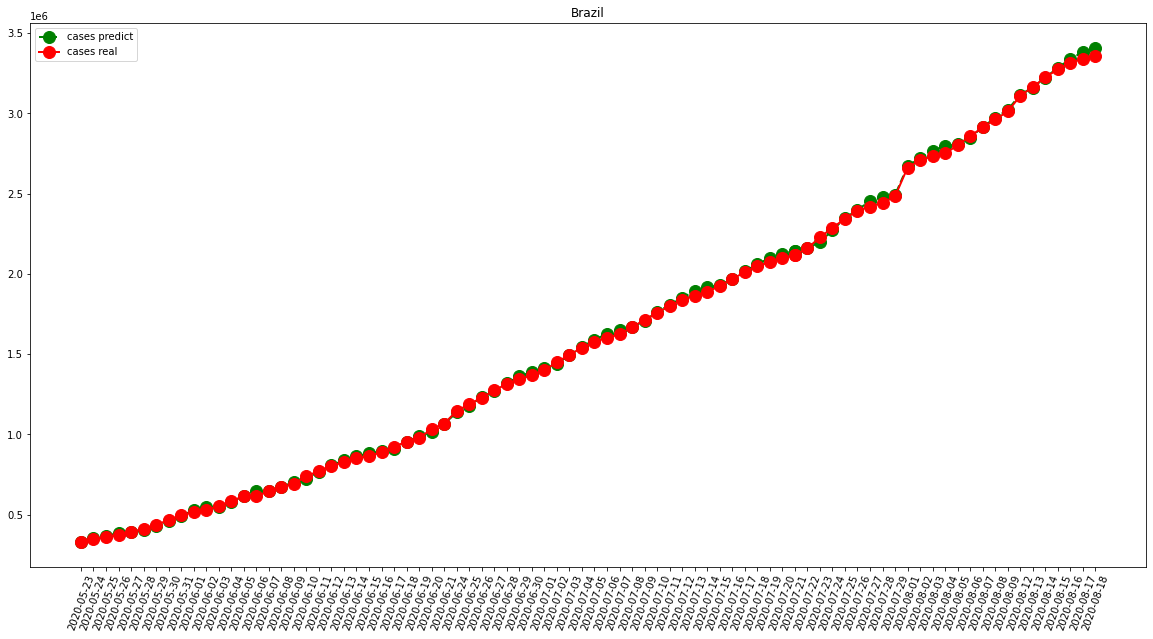

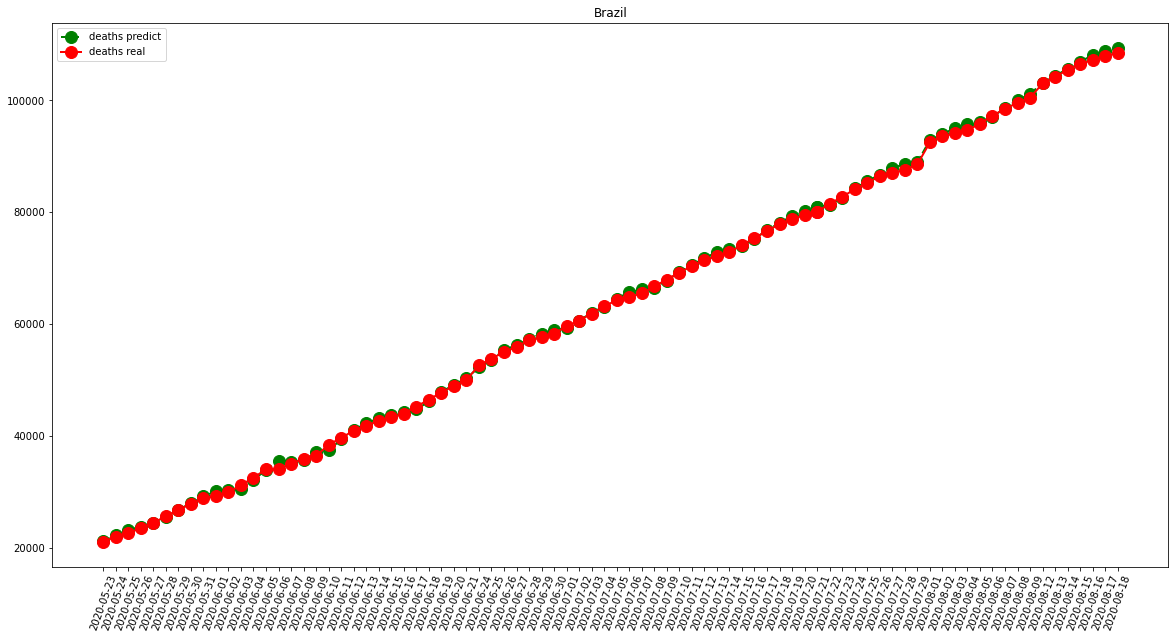

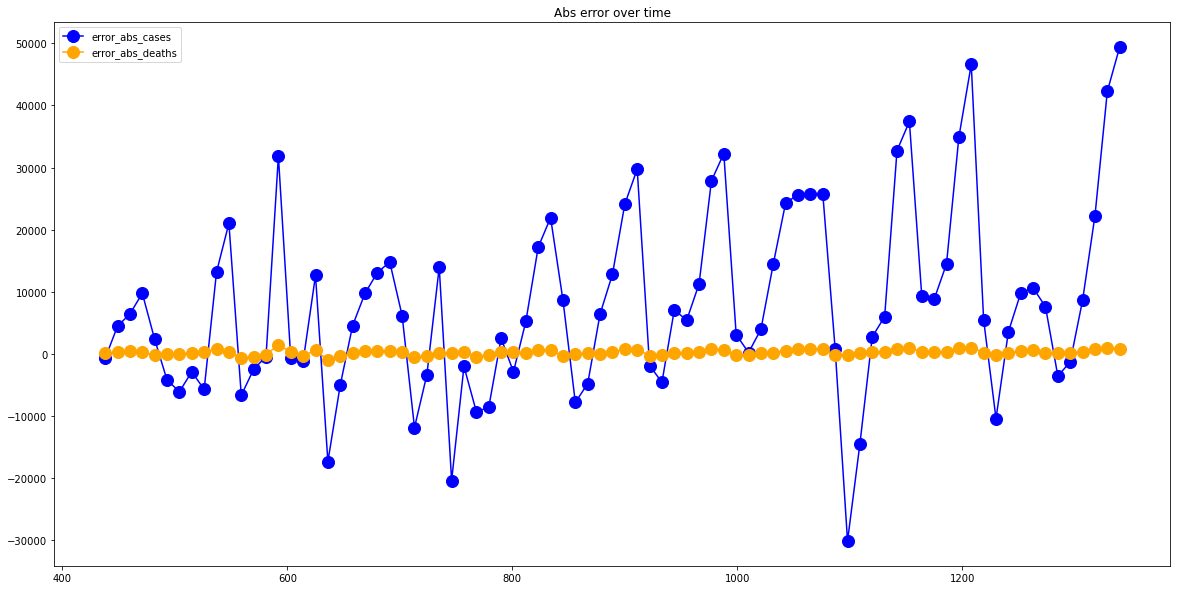

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)